<a href="https://colab.research.google.com/github/NicolLoaiza1/Segundo-Parcial-420/blob/main/Segundo_parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
%matplotlib inline

## 1 Regresion Logistica


In [26]:
# Cargar datos
data = np.loadtxt(os.path.join('ChurnModeling_2.csv'), delimiter=',', skiprows=1)
X, y = data[:, 0:10], data[:, 10]
print(X)
print(y)
m = y.size
print(m)

[[6.1900000e+02 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [6.0800000e+02 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [5.0200000e+02 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [7.0900000e+02 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [7.7200000e+02 2.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [7.9200000e+02 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]
[1. 0. 1. ... 1. 1. 0.]
10000


### 1.1 Visualizar los datos



In [27]:
def plotData(X, y):
    fig = pyplot.figure()
    pos = y == 1
    neg = y == 0
    #Numero de x
    pyplot.plot(X[pos, 0], X[pos, 1], X[pos, 2], X[pos, 3], X[pos, 4], X[pos, 5], X[pos, 6], X[pos, 7], X[pos, 8], X[pos, 9],  'k*', lw=2, ms=10)
    pyplot.plot(X[pos, 0], X[pos, 1], X[pos, 2], X[pos, 3], X[pos, 4], X[pos, 5], X[pos, 6], X[pos, 7], X[pos, 8], X[pos, 9],  'ko', mfc='y', ms=8, mec='k', mew=1)



Se llama a la función implementada para mostrar los datos cargados:

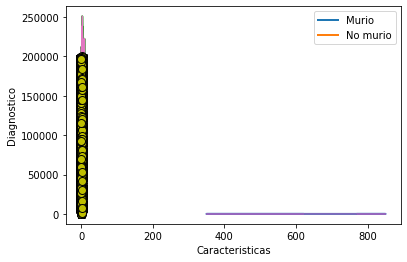

In [28]:
plotData(X, y)
# adiciona etiquetas para los ejes
pyplot.xlabel('Caracteristicas')
pyplot.ylabel('Diagnostico')
pyplot.legend(['Murio', 'No murio'])
pass

<a id="section1"></a>
### 1.2 Implementacion

#### 1.2.1 Fución Sigmoidea


In [29]:
def sigmoid(z):
    z = np.array(z)
  
    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. RE recomienda experimentar con otros valores de `z`.

In [30]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


<a id="section2"></a>
#### 1.2.2 Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X. 

In [31]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción. 
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

print(X[5])

[1.0000000e+00 6.4500000e+02 1.0000000e+00 1.0000000e+00 4.4000000e+01
 8.0000000e+00 1.1375578e+05 2.0000000e+00 1.0000000e+00 0.0000000e+00
 1.4975671e+05]


La funcion de costo en una regresión logistica es:


In [32]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    
    return J

In [33]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
       
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

<ipython-input-29-14fdc13e904d>:6: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
<ipython-input-32-e987378c4d32>:7: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


theta calculado por el descenso por el gradiente: [-0.00107439 -0.80483726  0.00324306 -0.00274566  0.07738621 -0.00680479
  0.50817925 -0.00207922 -0.00086249 -0.00369047  0.24376782]
probabilidad de tener insuficiencia cardiaca es del 1.0


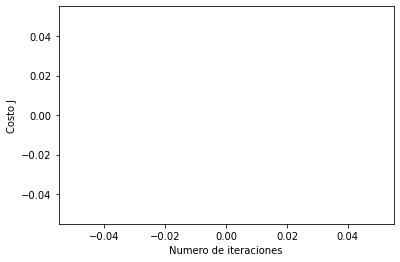

In [55]:
alpha = 0.0001
num_iters = 1000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(11)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1,653,2,1,58,1,132602.88,1,1,0,5097.67]
fallece = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto
result = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print("probabilidad de tener insuficiencia cardiaca es del "+ str( result ))

In [35]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)
    
    return J, grad

Se prueba la funcion `costFunction` utilizando dos casos de prueba para $\theta$.

In [36]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[2.96300000e-01 1.93806300e+02 1.70650000e-01 1.83050000e-01
 1.03274000e+01 1.50160000e+00 1.96841352e+04 4.64600000e-01
 2.10350000e-01 1.84050000e-01 2.93765614e+04]
Gradiente en theta inicial (zeros):
	[0.2963, 193.8063, 0.1706]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [37]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([-24,653,2,1,58,1,132602.88,1,1,0,5097.67])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.043, 2.566, 2.647]')

[-2.4000000e+01  6.5300000e+02  2.0000000e+00  1.0000000e+00
  5.8000000e+01  1.0000000e+00  1.3260288e+05  1.0000000e+00
  1.0000000e+00  0.0000000e+00  5.0976700e+03]
Costo en theta prueba: nan
Costo esperado (aproximado): 0.218

Gradiente en theta prueba:
	[0.796, 519.071, 0.545]
Gradiente esperado (aproximado):
	[0.043, 2.566, 2.647]


<ipython-input-35-1a3084f56ce3>:10: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


In [38]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[-25.161, 0.206, 0.201]')

Costo con un valor de theta encontrado por optimize.minimize: 0.445
Costo esperado (aproximado): 0.203

theta:
	[-0.171, -0.004, 0.523]
Theta esperado (aproximado):
	[-25.161, 0.206, 0.201]


Una vez que se completa `optimize.minimize`, se usa el valor final de $\theta$ para visualizar el límite de decisión en los datos de entrenamiento.

Para hacerlo, se implementa la función `plotDecisionBoundary` para trazar el límite de decisión sobre los datos de entrenamiento.

<a id="section4"></a>
#### 1.2.4 Evaluación de la regresión logistica

Después de aprender los parámetros, se puede usar el modelo para predecir si un estudiante en particular será admitido. Para un estudiante con una puntuación en el Examen 1 de 45 y una puntuación en el Examen 2 de 85, debe esperar ver una probabilidad de admisión de 0,776. Otra forma de evaluar la calidad de los parámetros que hemos encontrado es ver qué tan bien predice el modelo aprendido en nuestro conjunto de entrenamiento. 

In [41]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).
    
    X : array_like
        Datos utilizados para el calculo de las predicciones. 
        La fila es el numero de los puntos para calcular las predicciones, 
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X. 
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

Una vez entrenado el modelo se procede a realizar la prediccion y evaluación de los resultados de predecir cual es el valor que vota el modelo para todos los datos utilizados en el entrenamiento.

In [42]:
prob = sigmoid(np.dot([1, 619,0,0,42,2,0,1,1,1,101348.88], theta))
print('Para un cliente, se predice una probabilidad de: {:.3f}%'.format(prob))
print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
print('Precisión esperada (aproximadamente): 89.00 %')

Para un cliente, se predice una probabilidad de: 0.160%
Valor esperado: 0.775 +/- 0.002

Precisión de entrenamiento: 80.55 %
Precisión esperada (aproximadamente): 89.00 %
